# MAX-Independent Set Using QAOAToolkit's Skeletor
***
QAOAToolkit also included a "skeletor" (named after a cartoon villan) where users are allowed to map most problems that can be expressed as an objective function into a QAOA circuit and run it with ease. The idea behind the function is to aide those with minimal exposure to quantum circuits and help them run the process with ease.The example below is follows another combinatorial problem: Max-Independent Set. It follows suit with the example above just that users need to define the objective function and the variables list just like in the 1st Tutorial:

{(0, 1): Text(0.654508480212244, 0.4755283023511464, '1.0'),
 (0, 2): Text(0.09549145273252935, 0.2938926212887637, '1.0'),
 (1, 2): Text(-0.2500000670552266, 0.7694208997980517, '1.0'),
 (2, 3): Text(-0.8090170349302954, -6.55651103964594e-08, '1.0'),
 (2, 4): Text(-0.24999999254941926, -0.18163562741820138, '1.0'),
 (3, 4): Text(-0.24999993294477343, -0.7694209117189807, '1.0')}

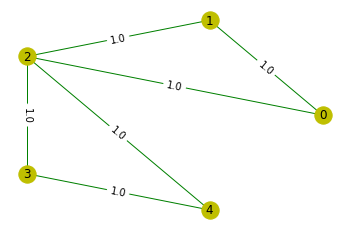

In [2]:
# Create a graph for the problem its is also adviseable to instantiate the weight of the graphs else it 
# be defaulted to 1
import networkx as nx 
import numpy as np
import matplotlib.pyplot as plt 
from   matplotlib import cm
from   matplotlib.ticker import LinearLocator, FormatStrFormatter

n     = 5
V     = np.arange(0,n,1)
E     =[(0,1,1.0),(0,2,1.0),(1,2,1.0),(3,2,1.0),(3,4,1.0),(4,2,1.0)] 

G     = nx.Graph()
G.add_nodes_from(V)
G.add_weighted_edges_from(E)

fig = plt.figure()
ax1 = plt.subplot2grid((1, 1), (0, 0))
labels = nx.get_edge_attributes(G,'weight')

nx.draw(G,with_labels=True, pos=nx.circular_layout(G), node_color='y', edge_color='g')
nx.draw_networkx_edge_labels(G,nx.circular_layout(G),edge_labels=labels)

In [3]:
# import the predefined library
import os 
os.path.abspath(os.curdir)
os.path.sys.path.append('../predefined_problems/')

import skeletor as skel
os.path.abspath(os.curdir)
os.path.sys.path.append('../hamiltonian_engine/')
from hamiltonian import mixer_hamiltonian

In [4]:
obj1 = 'x_u'
v1 = ['x_u']

qaoa_process = skel.skeletor(2, obj1, v1, True, graph=G)

In [5]:
qaoa_process.set_upMixerHamiltonian("controlled", True)        

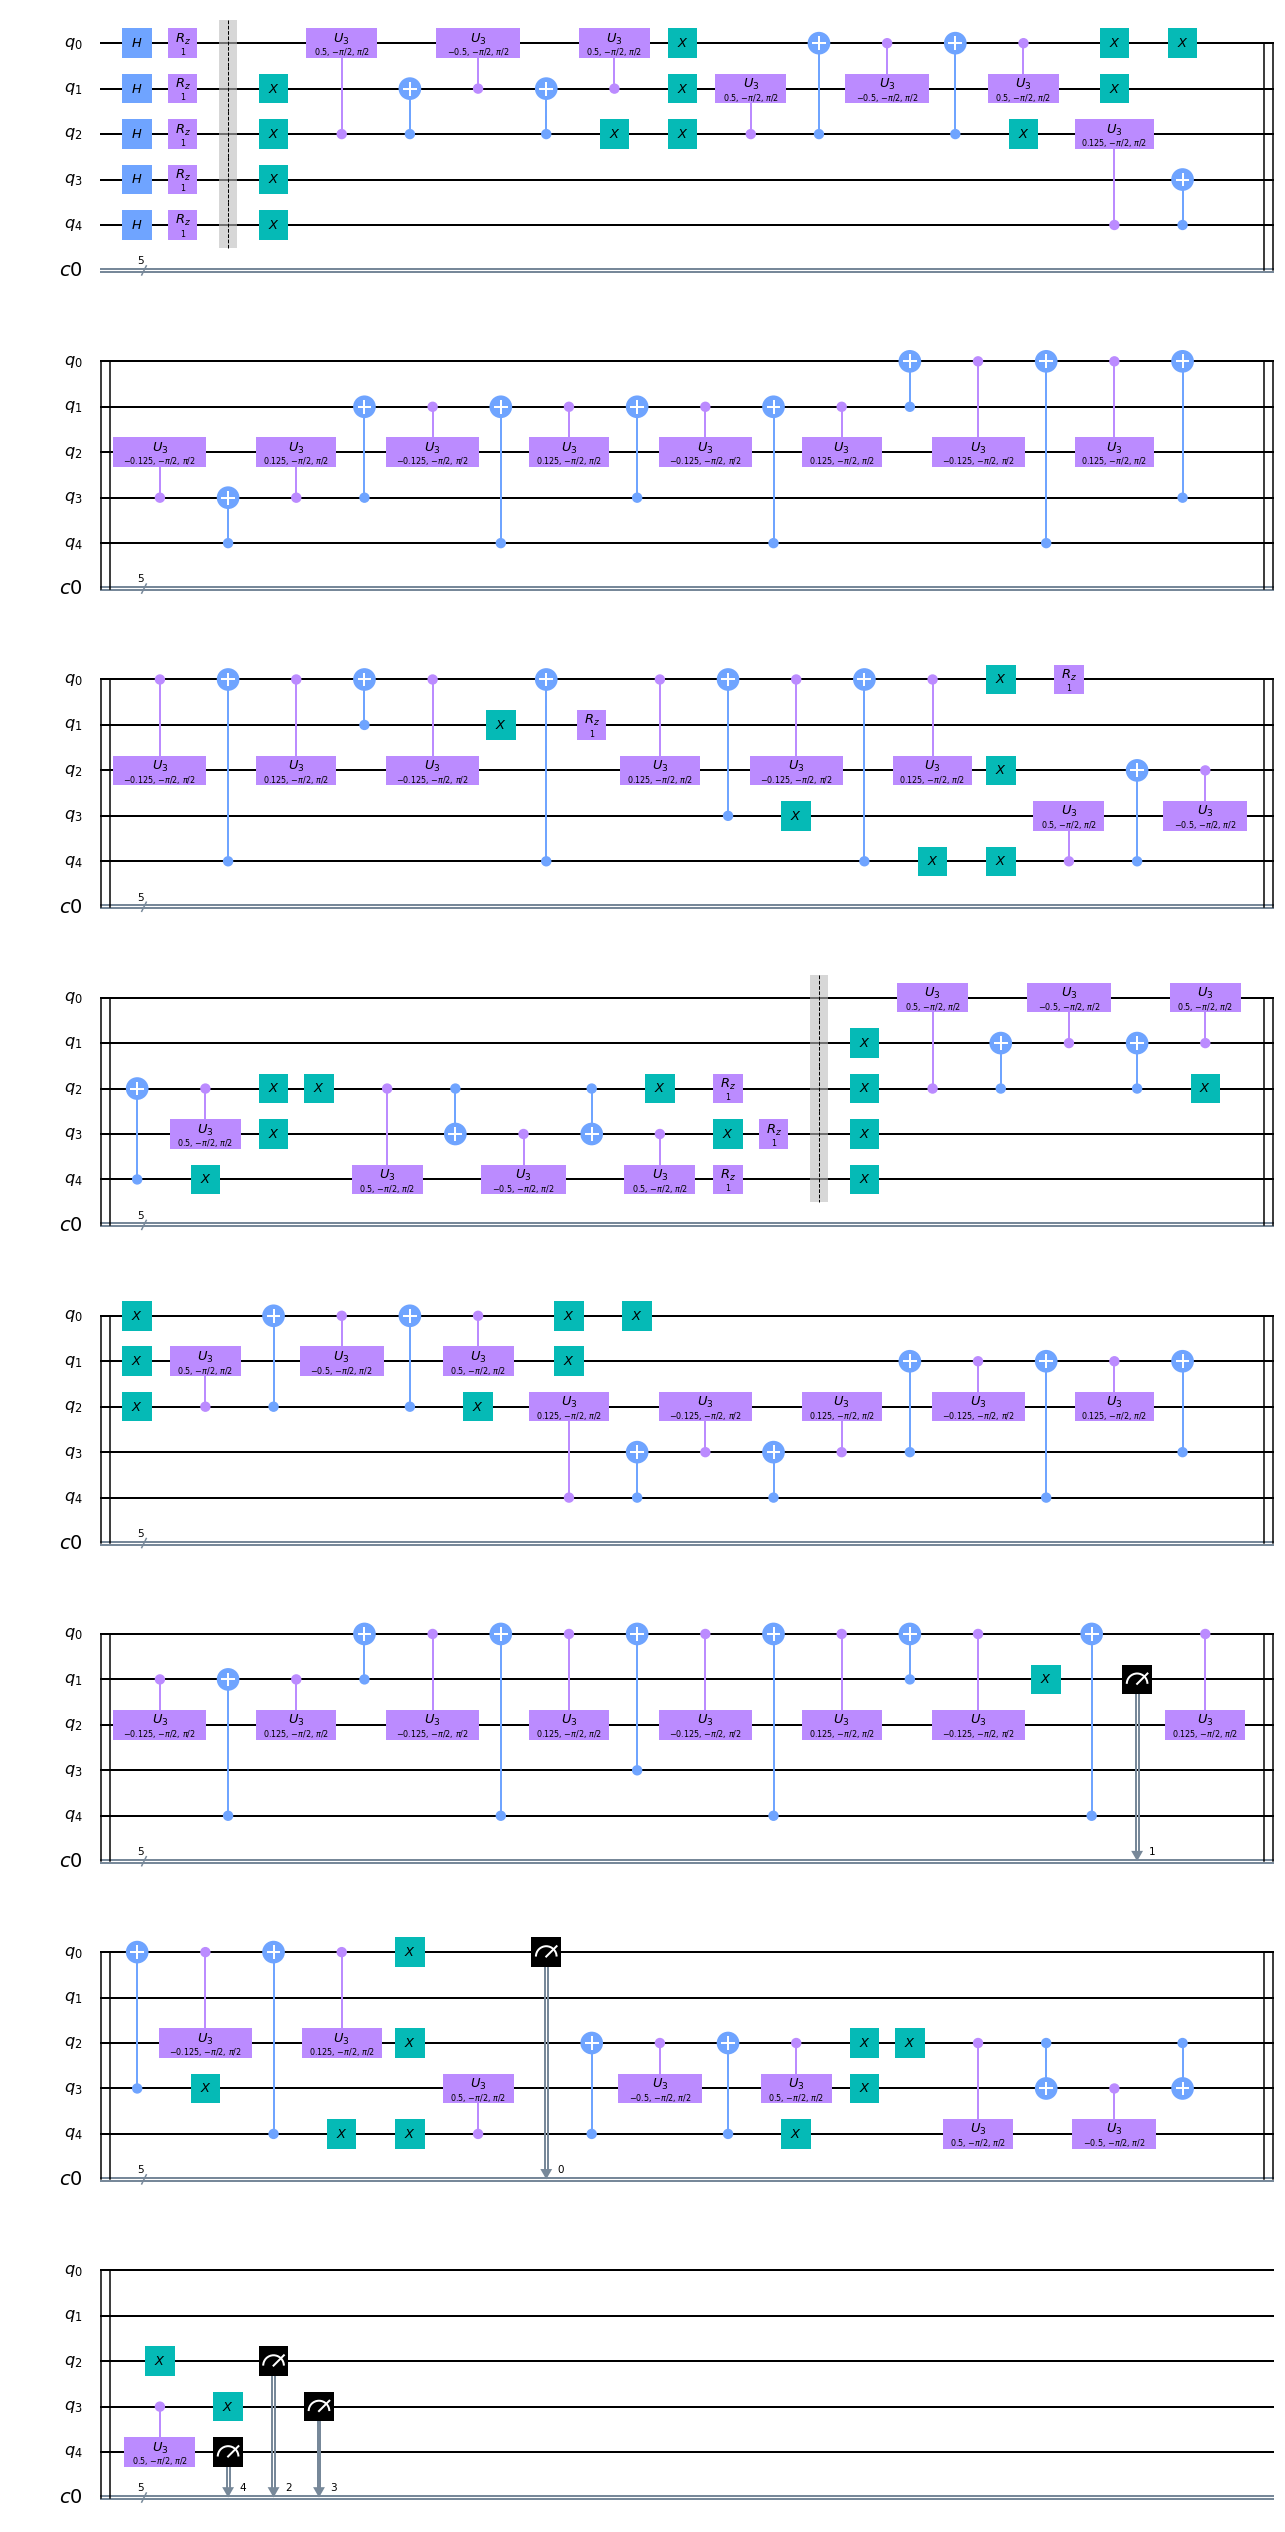

In [6]:
qaoa_process.generate_quantumCircuit([1.0,1.0,1.0,1.0])

In [7]:
opt_param = qaoa_process.run_QAOA([1.0, np.pi/2,1.0, np.pi/2], 'COBYLA')

     fun: -2.8017578125
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 36
  status: 1
 success: True
       x: array([2.19396729, 2.59543257, 0.82984688, 1.66115234])


In [8]:
qaoa_process.generate_quantumCircuit(opt_param)
res = qaoa_process.run_circuit()

backend setup: Complete running circuit
Simulation: Complete!
Expectation Value : 2.7607421875


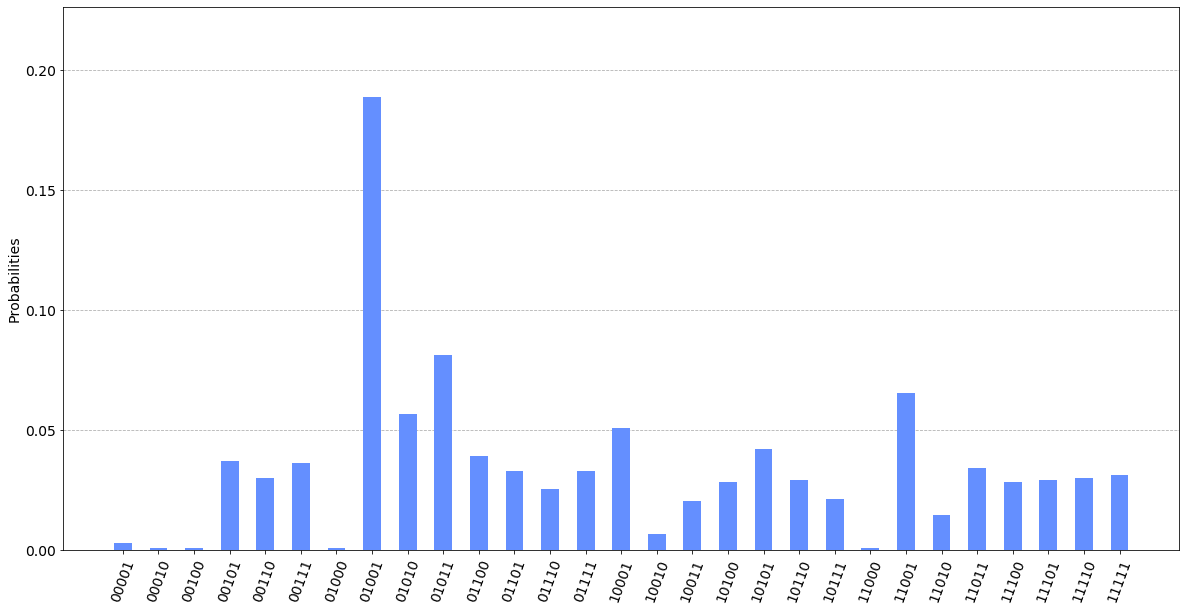

In [9]:
from qiskit.visualization import plot_histogram
plot_histogram(res.get_counts(),figsize = (20,10),bar_labels = False)